In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Preparation

In [2]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customer_id       10000 non-null  int64   
 1   credit_score      10000 non-null  int64   
 2   country           10000 non-null  object  
 3   gender            10000 non-null  category
 4   age               10000 non-null  int64   
 5   tenure            10000 non-null  int64   
 6   balance           10000 non-null  float64 
 7   products_number   10000 non-null  int64   
 8   credit_card       10000 non-null  int64   
 9   active_member     10000 non-null  int64   
 10  estimated_salary  10000 non-null  float64 
 11  churn             10000 non-null  int64   
dtypes: category(1), float64(2), int64(8), object(1)
memory usage: 869.4+ KB


In [4]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Data Cleaning
- Null values
- Duplicates
- Wrong values
- Wrong format
 

In [9]:
# Checking for null values

df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [12]:
# Checking for duplicates

df.duplicated().sum()

0

In [13]:
# Changing data format to categorical data

df["gender"] = df["gender"].astype('category')

In [16]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


Data is clean
No correlation

# Machine Learning

In [17]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customer_id       10000 non-null  int64   
 1   credit_score      10000 non-null  int64   
 2   country           10000 non-null  object  
 3   gender            10000 non-null  category
 4   age               10000 non-null  int64   
 5   tenure            10000 non-null  int64   
 6   balance           10000 non-null  float64 
 7   products_number   10000 non-null  int64   
 8   credit_card       10000 non-null  int64   
 9   active_member     10000 non-null  int64   
 10  estimated_salary  10000 non-null  float64 
 11  churn             10000 non-null  int64   
dtypes: category(1), float64(2), int64(8), object(1)
memory usage: 869.4+ KB


In [24]:
df.churn.unique()
df.churn.value_counts()

0    7963
1    2037
Name: churn, dtype: int64

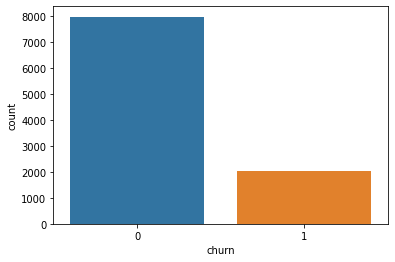

In [27]:
sns.countplot(x="churn", data=df)
plt.show()

In [31]:
churn = len(df[df["churn"] == 1])
no_churn = len(df[df["churn"] == 0])
perc_churn = (churn*100)/len(df)
perc_nochurn = (no_churn*100)/len(df)
print(f"percentage of churn: {perc_churn:.1f}")
print(f"percentage of no churn: {perc_nochurn:.1f}")

percentage of churn: 20.4
percentage of no churn: 79.6


Encoding categorical data

In [37]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
onehotarray = encoder.fit_transform(df[["gender"]]).toarray()
items = [f'{"gender"}_{item}' for item in encoder.categories_[0]]
df[items] = onehotarray

In [38]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Female,gender_Male
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1.0,0.0
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1.0,0.0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1.0,0.0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0.0,1.0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0.0,1.0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1.0,0.0
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0


Test p-value for significance

In [40]:
from scipy import stats

corr_df = pd.DataFrame(columns=['r', 'P-value'])

for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
        r , p = stats.pearsonr(df.churn, df[col])
        corr_df.loc[col] = [round(r, 4), round(p, 4)]
    
corr_df

,r,P-value
customer_id,-0.0062,0.5322
credit_score,-0.0271,0.0067
age,0.2853,0.0000
tenure,-0.0140,0.1615
balance,0.1185,0.0000
products_number,-0.0478,0.0000
credit_card,-0.0071,0.4754
active_member,-0.1561,0.0000
estimated_salary,0.0121,0.2264
churn,1.0000,0.0000


Drop statistically insignificant columns i.e. customer_id, tenure, credit_card, estimated_salary

In [48]:
y = df.churn.values
x_data = df.drop(['customer_id','gender','country','churn','tenure','credit_card','estimated_salary'], axis='columns') 

In [49]:
x_data

,credit_score,age,balance,products_number,active_member,gender_Female,gender_Male
0,619,42,0.00,1,1,1.0,0.0
1,608,41,83807.86,1,1,1.0,0.0
2,502,42,159660.80,3,0,1.0,0.0
3,699,39,0.00,2,0,1.0,0.0
4,850,43,125510.82,1,1,1.0,0.0
...,...,...,...,...,...,...,...
9995,771,39,0.00,2,0,0.0,1.0
9996,516,35,57369.61,1,1,0.0,1.0
9997,709,36,0.00,1,1,1.0,0.0
9998,772,42,75075.31,2,0,0.0,1.0


Normalization 

In [50]:
#Normalization to handle unbalanced features 
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values
x.describe()

C:\Users\aduno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\aduno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,credit_score,age,balance,products_number,active_member,gender_Female,gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.282727,0.304848,0.176733,0.515100,0.454300,0.545700
std,0.193307,0.141727,0.248696,0.193885,0.499797,0.497932,0.497932
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468000,0.189189,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.604000,0.256757,0.387402,0.000000,1.000000,0.000000,1.000000
75%,0.736000,0.351351,0.508749,0.333333,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Split data

In [51]:
# Split the data into training and test set. We use 30% test data with a random state of 42 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=42)

# Logistic Regression Model

Train Model

In [52]:
model = LogisticRegression(max_iter=5251).fit(x_train, y_train)


Get results

In [53]:
# Attributes of the model
lr_score = model.score(x_train,y_train)
print(f"Test accuracy: {lr_score}")
print(f"intercept: {model.intercept_}")     #value of y when x = 0
print(f"slope: {model.coef_}")              #gradient of slope

Test accuracy: 0.8032857142857143
intercept: [-2.60013172]
slope: [[-0.35645261  5.0346329   1.23120991 -0.06321508 -1.02111481  0.26940349
  -0.26940398]]


Predict results

In [54]:
y_pred = model.predict(x_train)
print(f"predicted response:\n{y_pred} \n{y_train}")

predicted response:
[0 0 0 ... 0 0 0] 
[1 0 0 ... 1 1 0]


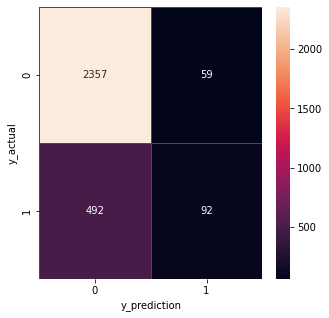

In [55]:
from sklearn.metrics import confusion_matrix

y_prediction = model.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual, y_prediction)

# heatmap visulization of confusion matrix
f, ax = plt.subplots(figsize =(5, 5))
sns.heatmap(cm, annot = True, linewidth=1, linecolor="green", fmt =".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()    

# KNN Classification Approach

In [58]:
# import KNN classification model
from sklearn.neighbors import KNeighborsClassifier
k= 14
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("{} nn score: {}".format(k, knn.score(x_test, y_test)))

knn_score = knn.score(x_test, y_test)

14 nn score: 0.8566666666666667


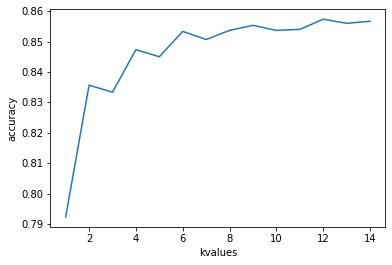

In [59]:
# testing differnt vaues of k with accuracy to determine the most favorable
# k ranges from 1-15
score_list = []
for each in range(1, 15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test, y_test))
    
plt.plot(range(1, 15), score_list)
plt.xlabel("kvalues")
plt.ylabel("accuracy")
plt.show()

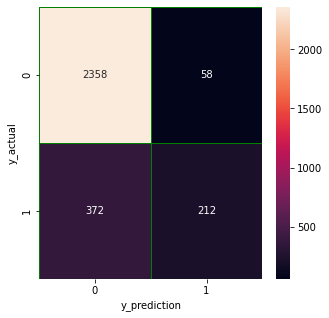

In [60]:
#confusion matrix
y_prediction = knn.predict(x_test)
y_actual=y_test
cm = confusion_matrix(y_actual, y_prediction)

# Heatmap visualization of conusion matrix
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot =  True, linewidths=1, linecolor = "green", fmt = ".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

# Decision Tree Approach

In [61]:
# Decision tree approach
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 50)
dt.fit(x_train, y_train)

print("score: ", dt.score(x_test, y_test))

dt_score = dt.score(x_test, y_test)

score:  0.7913333333333333


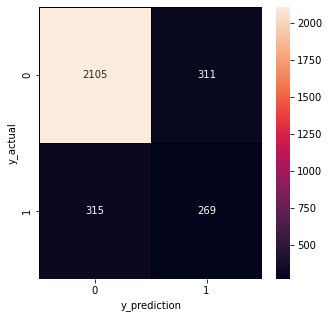

In [62]:
# confsion matrix
y_prediction2 = dt.predict(x_test)
y_actual2 = y_test
cm = confusion_matrix(y_actual2, y_prediction2)

# heatmap
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidths=1, linecolor="black", fmt =".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

# Random Forest Classification

In [63]:
# random forest classification
from sklearn.ensemble import RandomForestClassifier
# set n_estimators to 100 whcih means the model will use 100 subsets
rf = RandomForestClassifier(n_estimators = 100, random_state = 30)
rf.fit(x_train, y_train)
print("random forest model score: ", rf.score(x_test, y_test))
rf_score= rf.score(x_test, y_test)

random forest model score:  0.855


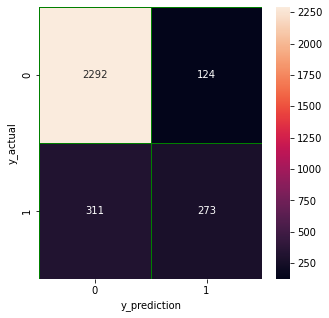

In [64]:
# confusion matrix
y_prediction3 = rf.predict(x_test)
y_actual3 = y_test
cm = confusion_matrix(y_actual3, y_prediction3)

# Heatmap
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor = "green", fmt = ".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

# Support Vector Machines

In [65]:
# SVM approach
from sklearn.svm import SVC
svm = SVC(random_state = 42)
svm.fit(x_train, y_train)

print("Accuracy of SVM: ", svm.score(x_test, y_test))

svm_score = svm.score(x_test, y_test)

Accuracy of SVM:  0.859


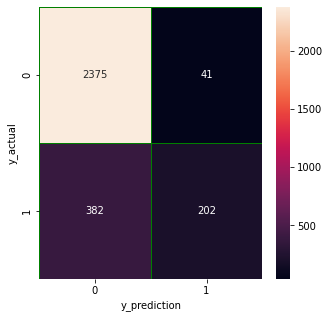

In [66]:
# Confusion matrix
from turtle import color


y_prediction4 = svm.predict(x_test)
y_actual4 = y_test
cm = confusion_matrix(y_actual4, y_prediction4)

# Heatmap
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor = "green", fmt = ".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

# Naive Bayes Classification

In [67]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

print("accuracy of naive bayes: ", nb.score(x_test, y_test))

nb_score = nb.score(x_test, y_test)

accuracy of naive bayes:  0.8383333333333334


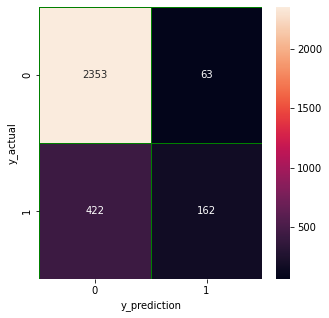

In [68]:
# Confusion matrix
y_prediction5 = nb.predict(x_test)
y_actual5 = y_test
cm = confusion_matrix(y_actual5, y_prediction5)

# heatmap
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor = "green", fmt = ".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

# Compare Classification Models

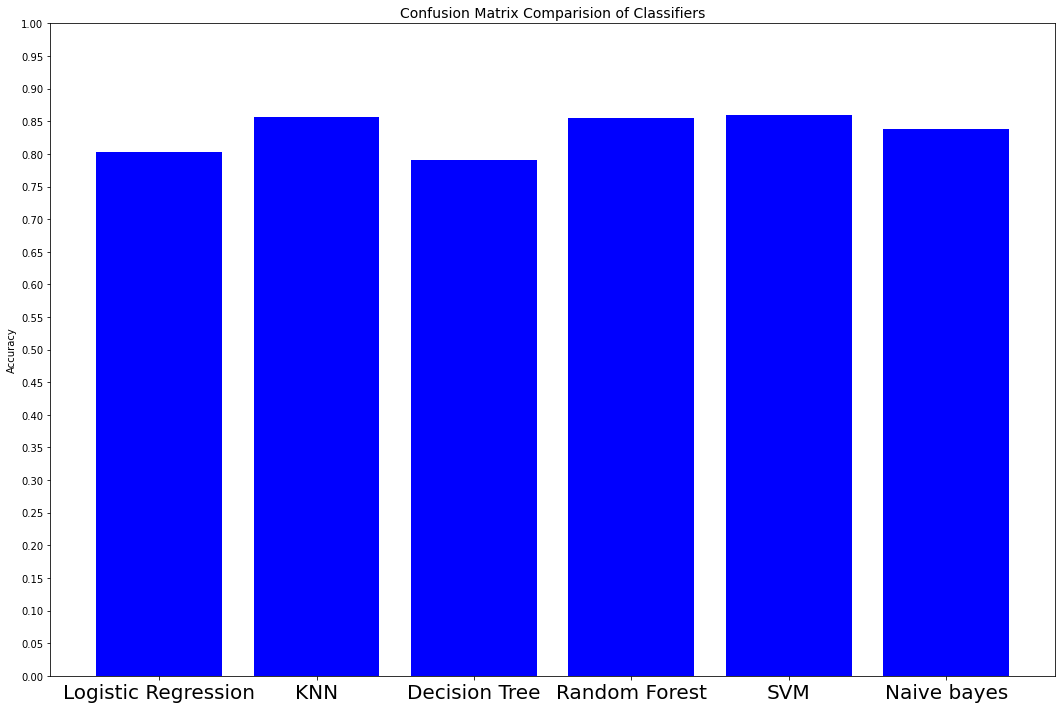

In [70]:
class_name = ("Logistic Regression", "KNN", "Decision Tree", "Random Forest", "SVM", "Naive bayes")
class_score = (lr_score, knn_score, dt_score, rf_score, svm_score, nb_score)
y_pos = np.arange(len(class_score))
colors = ("blue", "blue", "blue","blue", "blue","blue")
plt.figure(figsize=(18, 12))
plt.bar(y_pos, class_score, color=colors)
plt.xticks(y_pos, class_name, fontsize=20)
plt.yticks(np.arange(0.00, 1.05, step = 0.05))
plt.ylabel("Accuracy")

plt.title("Confusion Matrix Comparision of Classifiers", fontsize=14)
# plt.savefig("graph.png")
plt.show()